In [1]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn
!pip install seaborn --upgrade
! pip install datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 102.3 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.47.1
    Uninstalling transformers-4.47.1:
      Successfully uninstalled transformers-4.47.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.6/336.6 kB 23.3 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 1.2.1
    Uninstalling accelerate-1.2.1:
      Successfully uninstalled accelerate-1.2.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.8 MB/s eta 0:00:00
  Attempt

In [50]:
import numpy as np

In [2]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset("imdb")

train_df = dataset["train"].to_pandas()
test_df = dataset["test"].to_pandas()

df = pd.concat([train_df, test_df], ignore_index=True)

df

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0
...,...,...
49995,Just got around to seeing Monster Man yesterda...,1
49996,I got this as part of a competition prize. I w...,1
49997,I got Monster Man in a box set of three films ...,1
49998,"Five minutes in, i started to feel how naff th...",1


In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    50000 non-null  object
 1   label   50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


,0
text,0
label,0


In [4]:
# df['sentiment_id'] = (df['sentiment'] == 'positive').astype(int)

In [5]:
df['label'].value_counts()

,count
label,
0,25000
1,25000


# Dataset Analysis

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

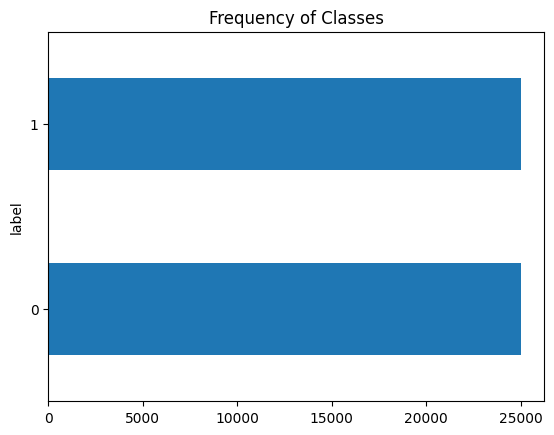

In [7]:
label_counts = df['label'].value_counts(ascending=True)
label_counts.plot.barh()
plt.title("Frequency of Classes")
plt.show()

<Axes: title={'center': 'Words per review'}, xlabel='label'>

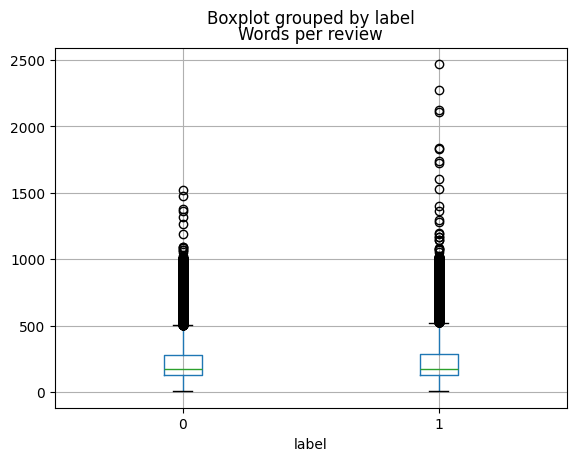

In [8]:
df['Words per review'] = df['text'].str.split().apply(len)
df.boxplot("Words per review", by="label")

#Text to Token Conversion

In [9]:
from transformers import AutoTokenizer

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [10]:
model_ckpt = "bert-base-uncased"  #ENGLISH english
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

text = "We love to sleep! Winters are awesome!"
encoded_text = tokenizer(text)
print(encoded_text)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

{'input_ids': [101, 2057, 2293, 2000, 3637, 999, 12214, 2024, 12476, 999, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [11]:
len(tokenizer.vocab),tokenizer.vocab_size, tokenizer.model_max_length

(30522, 30522, 512)

# Data Loader and Train Test Split

In [12]:

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, stratify=df['label'])
test, validation = train_test_split(test, test_size=1/3, stratify=test['label'])
train.shape, test.shape, validation.shape

((35000, 3), (10000, 3), (5000, 3))

In [13]:
from datasets import Dataset, DatasetDict

dataset = DatasetDict({
    "train": Dataset.from_pandas(train, preserve_index=False),
    "test": Dataset.from_pandas(test, preserve_index=False),
    "validation": Dataset.from_pandas(validation, preserve_index=False)
})

In [14]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'Words per review'],
        num_rows: 35000
    })
    test: Dataset({
        features: ['text', 'label', 'Words per review'],
        num_rows: 10000
    })
    validation: Dataset({
        features: ['text', 'label', 'Words per review'],
        num_rows: 5000
    })
})

#Tokenization of emotion/sentiment data

In [15]:
dataset['train'][0]

{'text': "I absolutely hate this programme, what kind of people sit and watch this garbage?? OK my dad and mum love it lol but i make sure I'm well out of the room before it comes on. Its so depressing and dreary but the worst thing about it is the acting i cant stand all detective programmes such as this because the detectives are so wooden and heartless. What happened to detective programmes with real mystery??? I mean who wants to know what happened to fictional characters we know nothing about that died over 20 years ago??? I wish the bbc would put more comedy on bbc1 cos now with the vicar of dibley finished there is more room for crap like this.",
 'label': 0,
 'Words per review': 122}

In [16]:
def tokenize(batch):
    temp= tokenizer(batch['text'], padding=True, truncation=True, return_token_type_ids=True,)
    return temp

print(tokenize(dataset['train'][:2]))

{'input_ids': [[101, 1045, 7078, 5223, 2023, 4746, 1010, 2054, 2785, 1997, 2111, 4133, 1998, 3422, 2023, 13044, 1029, 1029, 7929, 2026, 3611, 1998, 12954, 2293, 2009, 8840, 2140, 2021, 1045, 2191, 2469, 1045, 1005, 1049, 2092, 2041, 1997, 1996, 2282, 2077, 2009, 3310, 2006, 1012, 2049, 2061, 2139, 24128, 1998, 2852, 14644, 2100, 2021, 1996, 5409, 2518, 2055, 2009, 2003, 1996, 3772, 1045, 2064, 2102, 3233, 2035, 6317, 8497, 2107, 2004, 2023, 2138, 1996, 18145, 2024, 2061, 4799, 1998, 2540, 3238, 1012, 2054, 3047, 2000, 6317, 8497, 2007, 2613, 6547, 1029, 1029, 1029, 1045, 2812, 2040, 4122, 2000, 2113, 2054, 3047, 2000, 7214, 3494, 2057, 2113, 2498, 2055, 2008, 2351, 2058, 2322, 2086, 3283, 1029, 1029, 1029, 1045, 4299, 1996, 4035, 2052, 2404, 2062, 4038, 2006, 4035, 2487, 2522, 2015, 2085, 2007, 1996, 12340, 1997, 4487, 29538, 2736, 2045, 2003, 2062, 2282, 2005, 10231, 2066, 2023, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 11

In [17]:
emotion_encoded=dataset.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/35000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [18]:
df['sentiment'] = df['label'].apply(lambda x: 'positive' if x == 1 else 'negative')


# label2id = {x['label']:x['sentiment'] for x in dataset ['train']}
# id2label = {v:k for k,v in label2id.items()}

label2id = df.set_index('sentiment')['label'].to_dict()
id2label = {v: k for k, v in label2id.items()}

label2id, id2label

({'negative': 0, 'positive': 1}, {0: 'negative', 1: 'positive'})

#Model Building

In [19]:
from transformers import AutoModel
import torch

In [20]:
model= AutoModel.from_pretrained(model_ckpt)

# Instead of:
# model = AutoModel.from_pretrained(model_ckpt)

# Use:
# from transformers import AutoModelForSequenceClassification, AutoConfig

# num_labels = len(label2id)  # Assuming label2id is already defined
# config = AutoConfig.from_pretrained(model_ckpt, num_labels=num_labels)
# model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, config=config).to(device)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [21]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [22]:
model.config
model_two="bert-base-cased"

In [23]:
from transformers import AutoModelForSequenceClassification, AutoConfig
Num_labels = len(label2id)
device = torch.device ("cuda" if torch. cuda.is_available() else "cpu")
config = AutoConfig.from_pretrained(model_ckpt, label2id=label2id, id2label=id2label)
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, config=config).to(device)

# import torch
# from transformers import AutoModelForSequenceClassification, AutoConfig
# import torch_xla.core.xla_model as xm  # Import torch_xla

# # Number of labels and device configuration
# num_labels = len(label2id)
# device = xm.xla_device()  # Use TPU device

# # Load configuration with label mappings
# config = AutoConfig.from_pretrained(
#     model_ckpt,
#     label2id=label2id,
#     id2label=id2label
# )

# # Load the model and move it to TPU
# model = AutoModelForSequenceClassification.from_pretrained(
#     model_ckpt,
#     config=config
# ).to(device)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [24]:
device


device(type='cuda')

In [25]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [41]:
from transformers import TrainingArguments

batch_size=32
training_dir = "bert_base_training_dir"
training_args= TrainingArguments(output_dir = training_dir,
              overwrite_output_dir = True,
              num_train_epochs = 2,
              learning_rate = 2e-5,
              per_device_train_batch_size = batch_size,
              per_device_eval_batch_size = batch_size,
              weight_decay = 0.01,
              evaluation_strategy = 'epoch',
              disable_tqdm = False
    )

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [42]:
! pip install evaluate

other than the above method, you can also use sklearn to calc accuracy

In [43]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics (pred) :
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

#Build Model and Trainer

In [44]:
from transformers import Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=emotion_encoded['train'],
    eval_dataset=emotion_encoded['validation'],
    compute_metrics=compute_metrics,
    tokenizer=tokenizer
)

<ipython-input-44-f7f22c6f6a80>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [46]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.185200,0.164210,0.940800,0.940800
2,0.100700,0.179331,0.943200,0.943196


TrainOutput(global_step=2188, training_loss=0.15802451243566204, metrics={'train_runtime': 6814.0998, 'train_samples_per_second': 10.273, 'train_steps_per_second': 0.321, 'total_flos': 1.84177738752e+16, 'train_loss': 0.15802451243566204, 'epoch': 2.0})

In [47]:
preds_output = trainer.predict(emotion_encoded[ 'test'])
preds_output.metrics

{'test_loss': 0.1904803216457367,
 'test_accuracy': 0.9419,
 'test_f1': 0.9418982424218332,
 'test_runtime': 305.7614,
 'test_samples_per_second': 32.705,
 'test_steps_per_second': 1.024}

In [48]:
preds_output.predictions

array([[-0.7251805 ,  0.8794849 ],
       [-2.2759352 ,  2.3175876 ],
       [-2.8565915 ,  3.0026882 ],
       ...,
       [-0.09407736,  0.31887984],
       [ 3.199959  , -2.751641  ],
       [ 3.6179364 , -3.312695  ]], dtype=float32)

In [51]:
y_pred = np.argmax(preds_output.predictions, axis=1)
y_true = emotion_encoded['test'][:]['label']

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      5000
           1       0.94      0.95      0.94      5000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [53]:
label2id

{'negative': 0, 'positive': 1}

AttributeError: module 'matplotlib.pyplot' has no attribute 'yabel'

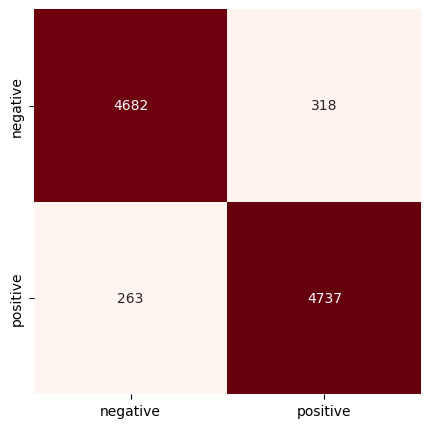

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, xticklabels=label2id.keys(), yticklabels=label2id.keys(), fmt ='d', cbar=False, cmap='Reds')
plt.yabel("Actual")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.show()

#Build Prediction function and save model

In [56]:
text = "Watching Interstellar was nothing short of an extraordinary journey that left me in awe long after the credits rolled. Directed by Christopher Nolan, this film transcends the boundaries of conventional cinema, taking us on a profound voyage through space and time that is as visually stunning as it is intellectually stimulating. From the moment Interstellar begins, you are thrust into a future Earth on the brink of ecological collapse. The desperation and urgency are palpable, setting the stage"
def get_prediction (text) :
    input_encoded = tokenizer(text, return_tensors='pt').to(device)
    with torch.no_grad():
      outputs = model(**input_encoded)
    logits = outputs. logits
    pred = torch.argmax(logits, dim=1) .item()
    return id2label[pred]
get_prediction (text)

'positive'

In [57]:
trainer.save_model("bert-base-uncased-sentiment-model")

In [58]:
# use pipeline for prediciton
from transformers import pipeline
classifier = pipeline('text-classification', model= 'bert-base-uncased-sentiment-model')
classifier([text, 'A very good day indeed', "We loved mth111", "I am feeling anxious"])

Device set to use cuda:0


[{'label': 'positive', 'score': 0.9982465505599976},
 {'label': 'positive', 'score': 0.9720883369445801},
 {'label': 'positive', 'score': 0.7652215361595154},
 {'label': 'negative', 'score': 0.5946014523506165}]

In [61]:
# make a file app.py, and use this code

!pip install streamlit
!pip install pyngrok


In [65]:
%%writefile app.py
import streamlit as st
from transformers import pipeline

st.title("Fine-Tuning BERT for Twitter Sentiment Classification")

classifier = pipeline('text-classification', model='bert-base-uncased-sentiment-model')

text = st.text_area("Enter Your Tweet Here")

if st.button("Predict"):
        result = classifier(text)
        st.write("Prediction Result:", result)

Overwriting app.py


In [63]:
# !streamlit run app.py &>/dev/null&

In [64]:

# %%writefile app.py
# import streamlit as st

# st.title('Streamlit App from Google Colab')
# st.write('This is a simple app running inside Colab!')

# # Import and set up the pyngrok tunnel
# from pyngrok import ngrok

# # Set up a tunnel to port 8501 (Streamlit's default port)
# public_url = ngrok.connect(port='8501')
# print(f'Streamlit app is live at: {public_url}')

# # Run the Streamlit app
# !streamlit run app.py &>/dev/null&


Overwriting app.py
